# Exploratory Data Analysis (EDA)

# 1) Importing packages

In [0]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [3]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# For processing and maths
import numpy as np
import pandas as pd
import datetime as dt
import requests
import pickle

# Loading combined dataset 

made from main file

In [0]:
df = pd.read_pickle('joined_data.pkl')

In [6]:
df.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,2019-05-08,2,MonthlySubscriptionPrice,45.640142
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,2019-04-16,2,MonthlySubscriptionPrice,21.871447


In [0]:
df.drop(['Customer.ID'], axis=1, inplace=True)

# 3)- Data Exploration

In [8]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
Years.customer,int64
Total.Call.centre.complaint.calls,int64
LoginsSite.Last.6Months,int64
LoginsSite.Last.Month,int64
Churn.Status,int64
Total.Unique.Calls,int64
Customer.Age,int64
Number.of.SMS,int64
Minutes.offnet,float64
Latitude,float64


### a)-Target feature

In [9]:
df['Churn.Status'].value_counts()

0    609
1    591
Name: Churn.Status, dtype: int64

In [10]:
n_group = df['Churn.Status'].value_counts()
n_group_sum = n_group.sum()

print('loyal customers: {}'.format(n_group[0]))
print('churing customers: {}'.format(n_group[1]))

print('percentage of loyal customers: {:.2f} {}'.format(n_group[0]/n_group_sum*100, '%'))
print('percentage of churing customers: {:.2f} {}'.format(n_group[1]/n_group_sum*100, '%'))

loyal customers: 609
churing customers: 591
percentage of loyal customers: 50.75 %
percentage of churing customers: 49.25 %


### b)-Checking categorical variables

In [11]:
df.head(2)

,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
0,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,2019-05-08,2,MonthlySubscriptionPrice,45.640142
1,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,2019-04-16,2,MonthlySubscriptionPrice,21.871447


In [12]:
# Checking unique categorical variables
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Previous.provider          7
Customer.Municipality    306
Province                  12
EndSubscription          263
Name_of_package            1
dtype: int64

**customerID is just id of customer. So, doesn't matter. But, values like 306 in "Customer.Municipality" are huge.** <br>

In [13]:
df['Previous.provider'].value_counts()

TELE2       286
KPN         274
Vodafone    178
Ben         171
T-Mobile    132
Telfort     119
0            34
Name: Previous.provider, dtype: int64

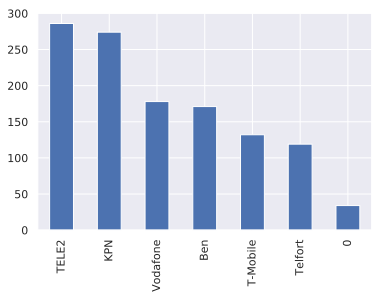

In [14]:
df['Previous.provider'].value_counts().plot.bar()

In [15]:
# Province
df['Province'].value_counts()

Zuid-Holland     287
Noord-Holland    187
Noord-Brabant    169
Gelderland       149
Utrecht           89
Overijssel        75
Limburg           72
Flevoland         39
Zeeland           36
Friesland         35
Drenthe           35
Groningen         27
Name: Province, dtype: int64

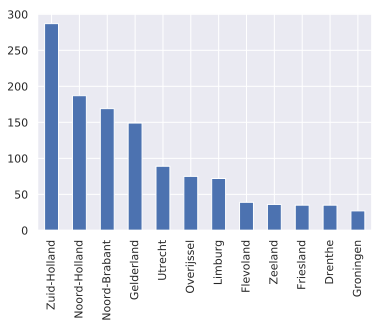

In [16]:
df['Province'].value_counts().plot.bar()

In [0]:
# Excluding customer municipality for having too many categories,MonthlySubscriptionPrice being one category, EndSubscription being time-date object
dtypes_object = table_dtype[table_dtype['Data Type'] == 'object'].index.tolist()
dtypes_object = [col for col in dtypes_object if col not in ['Customer.Municipality','EndSubscription','MonthlySubscriptionPrice']]

In [18]:
#Churn / Not churn rate statistics follow object type forecast variables
def _per_categorical(col):
    tbl_per = pd.pivot_table(df[['Churn.Status', col]], index = ['Churn.Status'], columns = [col], aggfunc = len)
    per_categorical = (tbl_per.iloc[0, :]/tbl_per.iloc[1, :]).sort_values(ascending = True)
    print(per_categorical)
    print('-------------------------------------\n')
    return per_categorical

for col in dtypes_object:
    _per_categorical(col)

Previous.provider
TELE2       0.692308
Vodafone    0.816327
KPN         1.075758
Ben         1.137500
Telfort     1.428571
T-Mobile    1.640000
0           2.090909
dtype: float64
-------------------------------------

Name_of_package
MonthlySubscriptionPrice    1.030457
dtype: float64
-------------------------------------

Province
Groningen        0.500000
Noord-Holland    0.798077
Zeeland          0.800000
Zuid-Holland     0.851613
Utrecht          0.934783
Flevoland        1.052632
Noord-Brabant    1.112500
Drenthe          1.187500
Friesland        1.187500
Gelderland       1.365079
Overijssel       1.586207
Limburg          1.880000
dtype: float64
-------------------------------------



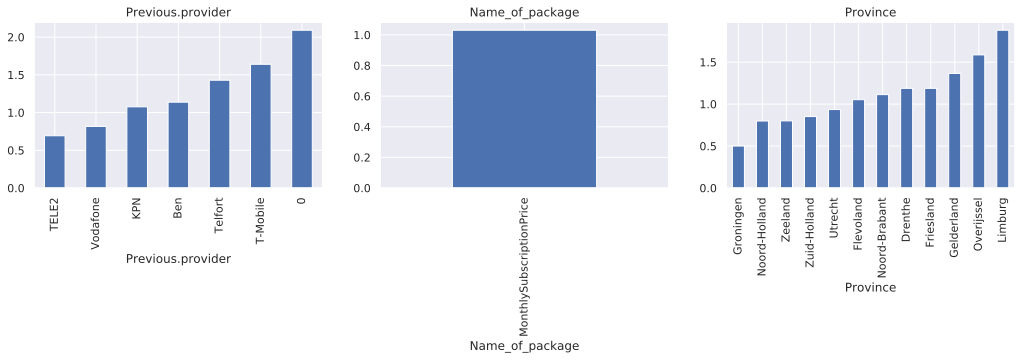

In [19]:
#Drawing the churn / Not churn scale chart according to the object type forecast variables.
def _plot_per_categorical(col):
    tbl_per = pd.pivot_table(df[['Churn.Status', col]], index = ['Churn.Status'], columns = [col], aggfunc = len)
    per_categorical = (tbl_per.iloc[0, :]/tbl_per.iloc[1, :]).sort_values(ascending = True)
    per_categorical.plot.bar()
    plt.title(col)
    return per_categorical

plt.figure(figsize = (30, 25))
i = 0
for col in dtypes_object:
    i += 1
    plt.subplot(7, 5, i)
    _plot_per_categorical(col)

### c)- Checking numerical variables

In [0]:
#correlations with the label feature and sort
correlations = df.corr()['Churn.Status'].sort_values()

In [21]:
print('Most Positive Correlations:\n', correlations.tail(5))

Most Positive Correlations:
 Minutes.offnet           0.020810
Latitude                 0.044653
Number.of.SMS            0.085679
LoginsSite.Last.Month    0.176349
Churn.Status             1.000000
Name: Churn.Status, dtype: float64


In [22]:
print('\nMost Negative Correlations:\n', correlations.head(5))


Most Negative Correlations:
 MonthlySubscriptionPrice   -0.339604
Total.Unique.Calls         -0.163671
Minutes.onnet              -0.140012
KBs.used                   -0.139699
Months.customer            -0.130409
Name: Churn.Status, dtype: float64


### d)- Time Series

In [0]:
#Convert object to datetime 
year_sub_end=df['EndSubscription']
df['End_sub']=pd.to_datetime(year_sub_end)

In [24]:
dtype(df['End_sub'])

dtype('<M8[ns]')

In [25]:
df['End_sub'].dt.year[:5]

0    2019
1    2019
2    2019
3    2019
4    2019
Name: End_sub, dtype: int64

In [26]:
df['End_sub'].dt.year.sort_values()[:5]

599     2018
771     2018
1036    2018
458     2018
167     2018
Name: End_sub, dtype: int64

In [0]:
data_year=df['End_sub'].dt.year.sort_values()

In [0]:
j=df.groupby(data_year)['Churn.Status'].value_counts()

In [29]:
j[:5]

End_sub  Churn.Status
2018     0                37
         1                22
2019     0               572
         1               569
Name: Churn.Status, dtype: int64

In [0]:
j=j.unstack('Churn.Status')

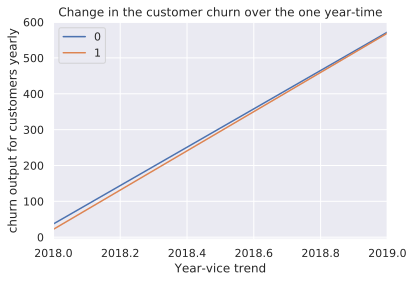

In [31]:
j.plot()
plt.xlabel('Year-vice trend')
plt.ylabel('churn output for customers yearly')
plt.title('Change in the customer churn over the one year-time')
plt.legend()
plt.show()

In [0]:
# Let's try with months
data_month=df['End_sub'].dt.month.sort_values()

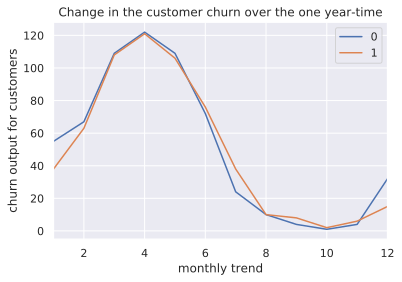

In [33]:
k=df.groupby(data_month)['Churn.Status'].value_counts()
k=k.unstack('Churn.Status')
k.plot()
plt.xlabel('monthly trend')
plt.ylabel('churn output for customers')
plt.title('Change in the customer churn over the one year-time')
plt.legend()
plt.show()

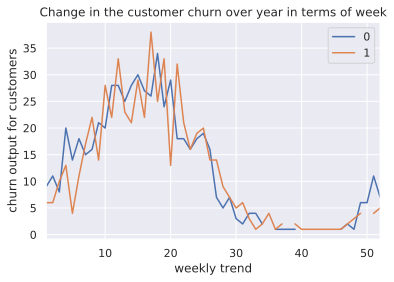

In [34]:
# And then what about week

data_week=df['End_sub'].dt.week.sort_values()
f=df.groupby(data_week)['Churn.Status'].value_counts()
f=f.unstack('Churn.Status')
f.plot()
plt.xlabel('weekly trend')
plt.ylabel('churn output for customers')
plt.title('Change in the customer churn over year in terms of week')
plt.legend()
plt.show()

In [0]:
# I will make month value as standard for this dataset and also for our pilot one. As we do not have much in years
df['EndSubscription']=df['End_sub'].dt.month

In [0]:
df.drop(['End_sub'], axis=1, inplace=True)

### e) Data Description

In [37]:
df.describe()

,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Churn.Status,Customer.Age,Latitude,Longitude,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1196.000000
mean,1449.879167,47.963500,4701.768722,2028.306172,2673.462550,29.699167,2.175305e+06,201.230000,0.492500,50.263333,52.074026,5.237919,5.783333,11.969167,4.454167,1.919167,25.398840
std,1277.940982,43.534543,7179.935753,3057.212614,5186.763577,60.427490,6.940443e+06,300.211014,0.500152,20.474659,0.485962,0.764339,1.938949,2.055903,2.401952,2.379570,16.576489
min,-5.000000,-221.000000,29.460000,0.078409,23.813500,0.000000,1.016000e-01,1.000000,0.000000,1.000000,50.773218,3.487605,1.000000,5.000000,1.000000,1.000000,-25.053562
25%,287.000000,9.392500,966.735000,330.172725,503.757469,3.000000,1.237192e+03,18.000000,0.000000,33.000000,51.813298,4.631314,4.000000,11.000000,3.000000,1.000000,14.421635
50%,1166.000000,38.730000,3530.894400,1333.372779,1553.224484,14.000000,1.321599e+05,77.500000,0.000000,49.000000,52.070498,5.121420,6.000000,12.000000,4.000000,1.000000,25.466279
75%,2245.750000,74.855000,5980.176000,2608.947728,3443.774867,31.000000,1.218452e+06,251.250000,1.000000,66.000000,52.367824,5.837226,7.000000,13.000000,6.000000,2.000000,36.632661
max,5451.000000,181.700000,146632.980000,41082.298830,127824.436900,874.000000,9.945640e+07,2596.000000,1.000000,100.000000,53.489374,6.977882,12.000000,18.000000,12.000000,49.000000,121.527382


In [38]:
df.describe(include=['object', 'bool'])

,Previous.provider,Customer.Municipality,Province,Name_of_package
count,1194,1200,1200,1200
unique,7,306,12,1
top,TELE2,Rotterdam,Zuid-Holland,MonthlySubscriptionPrice
freq,286,58,287,1200


In [39]:
df['Churn.Status'].value_counts()

0    609
1    591
Name: Churn.Status, dtype: int64

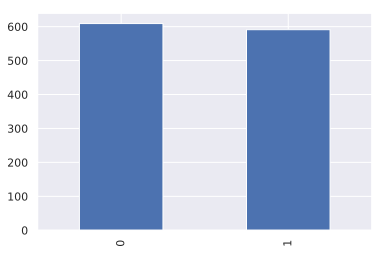

In [40]:
df['Churn.Status'].value_counts().plot(kind='bar')

### f)- Sorting

In [41]:
df.sort_values(by='Years.customer', ascending=False).head()

,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
304,5451,181.70,1048.6200,686.902455,361.717545,29,7.215920e+01,23,Vodafone,0,40,Albrandswaard,51.858068,4.423187,Zuid-Holland,6,13,2,2,MonthlySubscriptionPrice,24.700151
185,5374,179.13,6051.4800,4466.731665,1584.748335,0,5.256497e+05,682,Vodafone,0,28,Soest,52.176352,5.299197,Utrecht,8,13,12,3,MonthlySubscriptionPrice,15.190089
221,5363,178.77,5536.3080,1875.355806,3660.952194,11,1.838702e+06,929,T-Mobile,0,35,Den Haag,52.070498,4.300700,Zuid-Holland,3,15,5,3,MonthlySubscriptionPrice,22.517582
724,5349,178.30,7281.3024,2437.007145,4844.295255,9,1.512027e+05,379,KPN,0,21,Leidschendam-Voorburg,52.087731,4.399386,Zuid-Holland,5,14,3,1,MonthlySubscriptionPrice,5.109186
378,5334,177.80,5252.4000,659.005735,4593.394265,0,5.263327e+04,1460,Telfort,0,22,Krimpenerwaard,51.982222,4.781667,Zuid-Holland,7,12,5,1,MonthlySubscriptionPrice,6.905020


In [42]:
df.sort_values(by=['Churn.Status', 'Years.customer'], ascending=[True, False]).head()

,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
304,5451,181.70,1048.6200,686.902455,361.717545,29,7.215920e+01,23,Vodafone,0,40,Albrandswaard,51.858068,4.423187,Zuid-Holland,6,13,2,2,MonthlySubscriptionPrice,24.700151
185,5374,179.13,6051.4800,4466.731665,1584.748335,0,5.256497e+05,682,Vodafone,0,28,Soest,52.176352,5.299197,Utrecht,8,13,12,3,MonthlySubscriptionPrice,15.190089
221,5363,178.77,5536.3080,1875.355806,3660.952194,11,1.838702e+06,929,T-Mobile,0,35,Den Haag,52.070498,4.300700,Zuid-Holland,3,15,5,3,MonthlySubscriptionPrice,22.517582
724,5349,178.30,7281.3024,2437.007145,4844.295255,9,1.512027e+05,379,KPN,0,21,Leidschendam-Voorburg,52.087731,4.399386,Zuid-Holland,5,14,3,1,MonthlySubscriptionPrice,5.109186
378,5334,177.80,5252.4000,659.005735,4593.394265,0,5.263327e+04,1460,Telfort,0,22,Krimpenerwaard,51.982222,4.781667,Zuid-Holland,7,12,5,1,MonthlySubscriptionPrice,6.905020


###  g)- Indexing and retrieving data

In [43]:
df['Churn.Status'].mean()

0.4925

In [44]:
#Boolean indexing
df[df['Churn.Status'] == 0].mean()

Years.customer                       1.606619e+03
Months.customer                      5.355392e+01
Minutes.in.2018                      5.016981e+03
Minutes.onnet                        2.449803e+03
Minutes.offnet                       2.567177e+03
Number.of.SMS                        2.460099e+01
KBs.used                             3.130041e+06
Total.Unique.Calls                   2.496141e+02
Churn.Status                         0.000000e+00
Customer.Age                         5.086535e+01
Latitude                             5.205266e+01
Longitude                            5.292958e+00
LoginsSite.Last.Month                5.446634e+00
LoginsSite.Last.6Months              1.200821e+01
EndSubscription                      4.438424e+00
Total.Call.centre.complaint.calls    2.091954e+00
MonthlySubscriptionPrice             3.096045e+01
dtype: float64

In [45]:
df[df['Churn.Status'] == 0]['Minutes.onnet'].mean()

2449.8033358673424

In [47]:
df[df['Churn.Status'] == 0]['Minutes.offnet'].mean()

2567.1771882681287

In [48]:
df[df['Churn.Status'] == 0]['Minutes.onnet'].max()

41082.29883

In [49]:
df[df['Churn.Status'] == 0]['Minutes.offnet'].max()

40304.75321

### h)-Group

In [0]:
columns_to_show = ['Minutes.in.2018', 
                   'Minutes.onnet', 
                   'Minutes.offnet'
                    ]

In [51]:
df.groupby(['Churn.Status'])[columns_to_show].describe(percentiles=[])

Minutes.in.2018               ... Minutes.offnet              
                       count         mean  ...            50%           max
Churn.Status                               ...                             
0                      609.0  5016.980524  ...    1817.530783   40304.75321
1                      591.0  4376.956561  ...     770.893964  127824.43690

[2 rows x 18 columns]

In [52]:
# Make a group analysis 
data_new = df[['Churn.Status', 'Minutes.in.2018', 'Minutes.onnet', 'Minutes.offnet', 'Customer.Age']]
data_corrs = data_new.corr()
data_corrs

,Churn.Status,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Customer.Age
Churn.Status,1.000000,-0.044584,-0.140012,0.020810,-0.029860
Minutes.in.2018,-0.044584,1.000000,0.774364,0.927850,-0.045579
Minutes.onnet,-0.140012,0.774364,1.000000,0.482512,-0.015731
Minutes.offnet,0.020810,0.927850,0.482512,1.000000,-0.053822
Customer.Age,-0.029860,-0.045579,-0.015731,-0.053822,1.000000


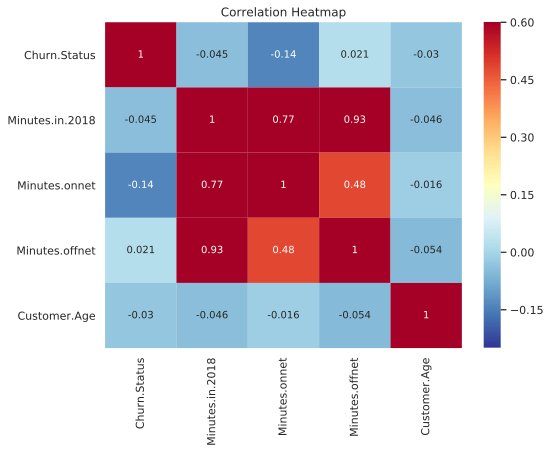

In [53]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

**distribution of each of these features colored by the value of the churn status**

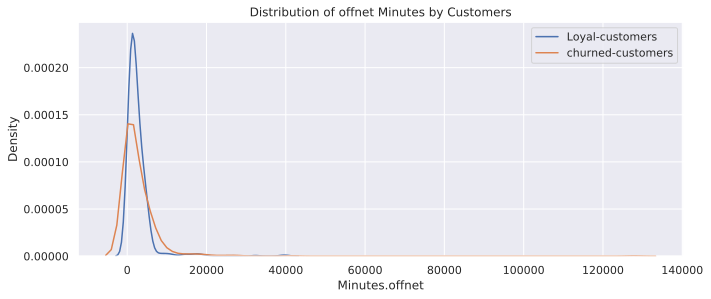

In [54]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['Minutes.offnet']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot when customer remained loyal
    sns.kdeplot(data_new.loc[data_new['Churn.Status'] == 0, source], label = 'Loyal-customers')
    # plot when customers left 
    sns.kdeplot(data_new.loc[data_new['Churn.Status'] == 1, source], label = 'churned-customers')
    
    # Label the plots
    plt.title('Distribution of offnet Minutes by Customers')
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

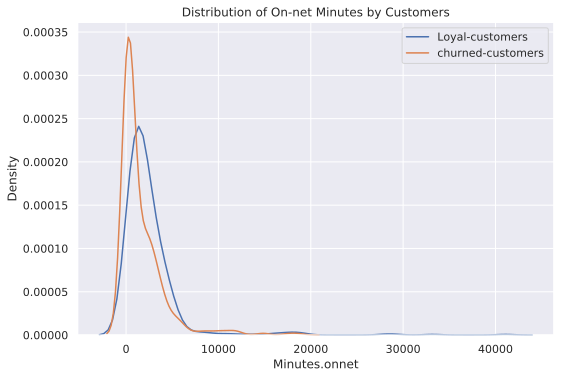

In [55]:
plt.figure(figsize = (8, 10))

# iterate through the sources
for i, source in enumerate(['Minutes.onnet']):
    
    # create a new subplot for each source
    plt.subplot(2, 1, i + 1)
    # plot when customer remained loyal
    sns.kdeplot(data_new.loc[data_new['Churn.Status'] == 0, source], label = 'Loyal-customers')
    # plot when customers left 
    sns.kdeplot(data_new.loc[data_new['Churn.Status'] == 1, source], label = 'churned-customers')
    
    # Label the plots
    plt.title('Distribution of On-net Minutes by Customers')
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2)

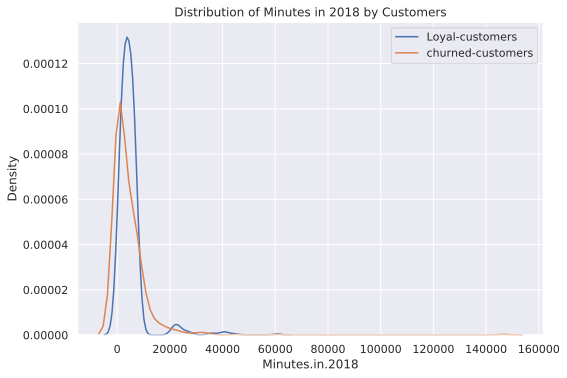

In [56]:
plt.figure(figsize = (8, 10))

# iterate through the sources
for i, source in enumerate(['Minutes.in.2018']):
    
    # create a new subplot for each source
    plt.subplot(2, 1, i + 1)
    # plot when customer remained loyal
    sns.kdeplot(data_new.loc[data_new['Churn.Status'] == 0, source], label = 'Loyal-customers')
    # plot when customers left 
    sns.kdeplot(data_new.loc[data_new['Churn.Status'] == 1, source], label = 'churned-customers')
    
    # Label the plots
    plt.title('Distribution of Minutes in 2018 by Customers')
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2)

### For Age

In [0]:
# Age information into a separate dataframe
age_data = df[['Churn.Status', 'Customer.Age']]

In [58]:
age_data.head(2)

,Churn.Status,Customer.Age
0,0,44
1,0,31


In [59]:
# Bin the age data
age_data['age_bin'] = pd.cut(age_data['Customer.Age'], bins = np.linspace(20, 100, num = 11))
age_data.head(10)

,Churn.Status,Customer.Age,age_bin
0,0,44,"(36.0, 44.0]"
1,0,31,"(28.0, 36.0]"
2,0,35,"(28.0, 36.0]"
3,1,54,"(52.0, 60.0]"
4,0,53,"(52.0, 60.0]"
5,0,79,"(76.0, 84.0]"
6,0,33,"(28.0, 36.0]"
7,1,76,"(68.0, 76.0]"
8,0,77,"(76.0, 84.0]"
9,0,34,"(28.0, 36.0]"


In [60]:
age_groups = age_data.groupby('age_bin').mean()
age_groups

,Churn.Status,Customer.Age
age_bin,,
"(20.0, 28.0]",0.525974,24.350649
"(28.0, 36.0]",0.490683,32.813665
"(36.0, 44.0]",0.503704,40.918519
"(44.0, 52.0]",0.496552,48.365517
"(52.0, 60.0]",0.557047,56.114094
"(60.0, 68.0]",0.479452,64.417808
"(68.0, 76.0]",0.451923,72.259615
"(76.0, 84.0]",0.500000,80.223684
"(84.0, 92.0]",0.395349,87.953488


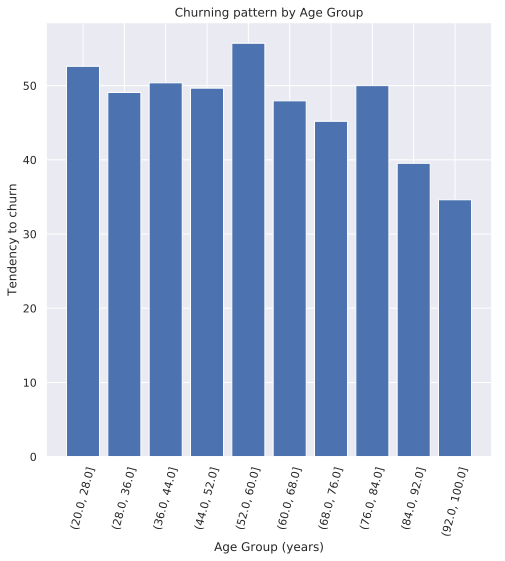

In [61]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * (age_groups['Churn.Status']))

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Tendency to churn')
plt.title('Churning pattern by Age Group');

# 4)- Finding Outliers

In a data set there are often unusual observations. The cause may come from misidentified data, wrong data entry, special-observation observations, etc. The investigation of abnormal data can help discover some of data and at the same time correct the data in case of incorrect input. Checking abnormal data can be done by descriptive statistics.

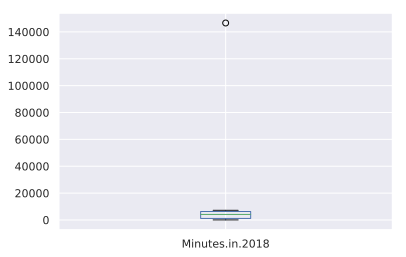

In [62]:
df['Minutes.in.2018'].describe().plot.box()

We find that minutes consuption in 2018 variable shows abnormal data when most quintiles of variables are low in origin 0 except for some special high cases. This shows that there is a difference in the usage of data for customers. Let's explore that

In [63]:
df['Minutes.in.2018'].describe()

count      1200.000000
mean       4701.768722
std        7179.935753
min          29.460000
25%         966.735000
50%        3530.894400
75%        5980.176000
max      146632.980000
Name: Minutes.in.2018, dtype: float64

mean is 4701 and then max value jumps to 146632.

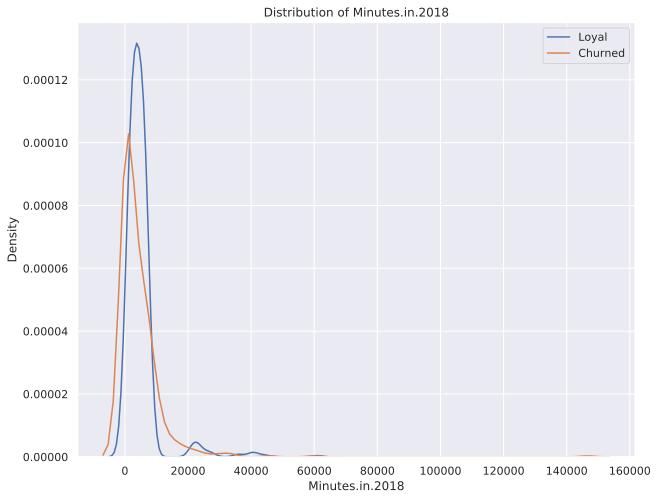

In [64]:
def _plot_density(colname):
    plt.figure(figsize = (10, 8))
    sns.kdeplot(df[colname][df['Churn.Status'] == 0], label = 'Loyal')
    sns.kdeplot(df[colname][df['Churn.Status'] == 1], label = 'Churned')
    plt.xlabel(colname)
    plt.ylabel('Density')
    plt.title('Distribution of %s'%colname)

_plot_density('Minutes.in.2018')

We need to regulate outliers in the range of permissible variations and reduces the deviation effect caused by them.

### 3 sigma method
This method is used to adjust the values outside the domain [[− 3σ, μ + 3σ] in that value domain. For values greater than μ + 3σ will be assigned with μ + 3σ and similar with a value less than μ − 3σ

In [65]:
def _zoom_3sigma(col, dataset, dataset_apl):
    '''
    col: Data column name
    dataset: The original data table is used to calculate about 3 sigma
    dataset_apl: New data table applies about 3 sigma taken from the dataset..
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low =  mu - 3*sigma
#     low =  0 if low < 0 else low
    high = mu + 3*sigma
    
    def _value(x):
        if x < low: return low
        elif x > high: return high
        else: return x
    xapl = dataset_apl[col]    
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
    print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
    print('Low value: {:.2f}'.format(low))
    print('High value: {:.2f}'.format(high))
    return xnew

# Check with FLAG_MOBIL variable
x = _zoom_3sigma('Minutes.in.2018', df, df)

Percentage of low: 0.00%
Percentage of high: 1.67%
Low value: -16838.04
High value: 26241.58


In [66]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [67]:
# Statistics of different values in all variables
def _count_unique(x):
    return pd.Series.nunique(x)

tbl_dis_val = df.apply(_count_unique).sort_values(ascending = False)
tbl_dis_val[tbl_dis_val > 500]

Minutes.onnet               1200
Minutes.offnet              1200
MonthlySubscriptionPrice    1196
KBs.used                    1196
Minutes.in.2018             1191
Months.customer              918
Years.customer               917
dtype: int64

In [0]:
cols_3sigma = tbl_dis_val[tbl_dis_val > 500].index.tolist()

In [69]:
# Remove outlier by 3 sigma
for col in cols_3sigma:
    print(col)
    df[col] = _zoom_3sigma(col, df, df) 
    print('------------------------\n')

Minutes.onnet
Percentage of low: 0.00%
Percentage of high: 2.00%
Low value: -7143.33
High value: 11199.94
------------------------

Minutes.offnet
Percentage of low: 0.00%
Percentage of high: 1.08%
Low value: -12886.83
High value: 18233.75
------------------------

MonthlySubscriptionPrice
Percentage of low: 0.17%
Percentage of high: 0.33%
Low value: -24.33
High value: 75.13
------------------------

KBs.used
Percentage of low: 0.00%
Percentage of high: 1.92%
Low value: -18646025.34
High value: 22996634.35
------------------------

Minutes.in.2018
Percentage of low: 0.00%
Percentage of high: 1.67%
Low value: -16838.04
High value: 26241.58
------------------------

Months.customer
Percentage of low: 0.17%
Percentage of high: 0.25%
Low value: -82.64
High value: 178.57
------------------------

Years.customer
Percentage of low: 0.00%
Percentage of high: 0.42%
Low value: -2383.94
High value: 5283.70
------------------------



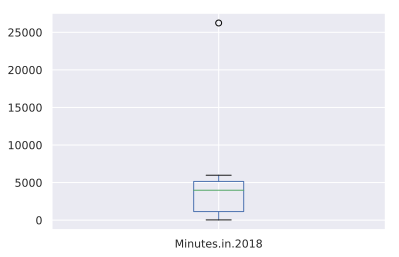

In [70]:
# Re-check AMT_INCOME_TOTAL variable after removing outlier
df['Minutes.in.2018'].describe().plot.box()

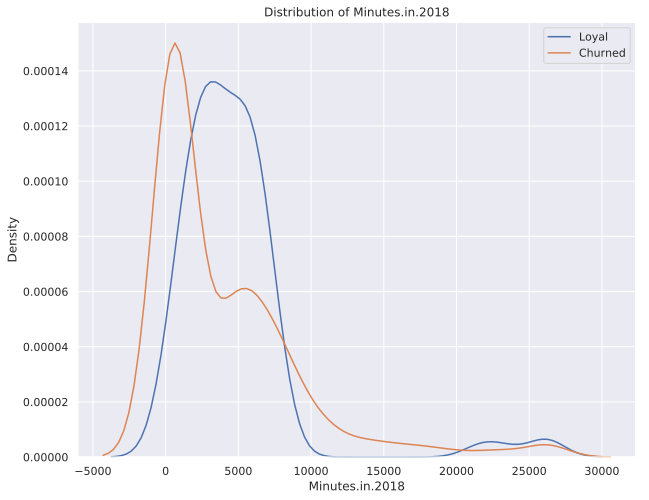

In [71]:
_plot_density('Minutes.in.2018')

# 5)- Correlation

In [0]:
corr = df[df.columns].corr()

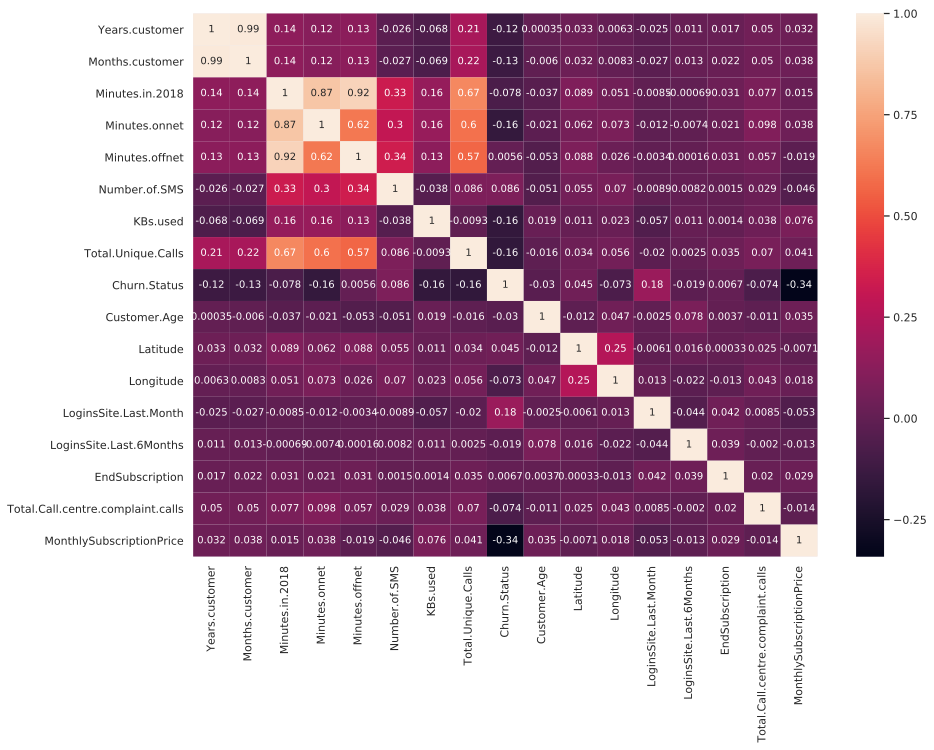

In [73]:
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr, annot = True)